In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
cifar10=tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test=x_train/255.0, x_test/255.0

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [5]:
K=len(set(y_train))
print(f'Number of classes in labels: {K}')

Number of classes in labels: 10


In [6]:
# building the model
i=Input(shape=(x_train[0].shape))
x=Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x=Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x=Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)
model=Model(i, x)

In [7]:
# compiling and fitting the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4839 - accuracy: 0.4636 - val_loss: 1.2173 - val_accuracy: 0.5590
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1573 - accuracy: 0.5840 - val_loss: 1.0619 - val_accuracy: 0.6224
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0040 - accuracy: 0.6446 - val_loss: 0.9597 - val_accuracy: 0.6558
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8923 - accuracy: 0.6820 - val_loss: 0.9394 - val_accuracy: 0.6661
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7885 - accuracy: 0.7204 - val_loss: 0.9162 - val_accuracy: 0.6783
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6982 - accuracy: 0.7525 - val_loss: 0.9041 - val_accuracy: 0.6871
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6236 - accuracy: 0.7775 - val_loss: 0.9003 - val_accuracy

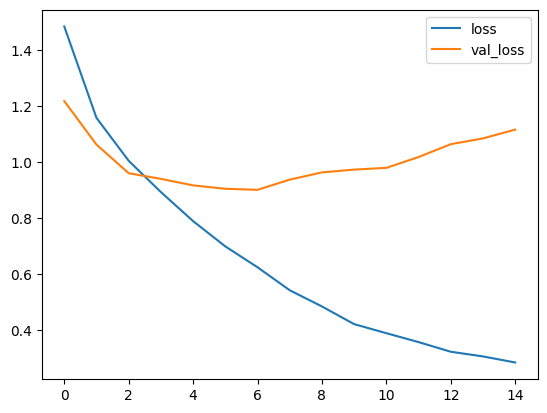

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

we can see that the validation loss is increasing it means our model has started to overfit

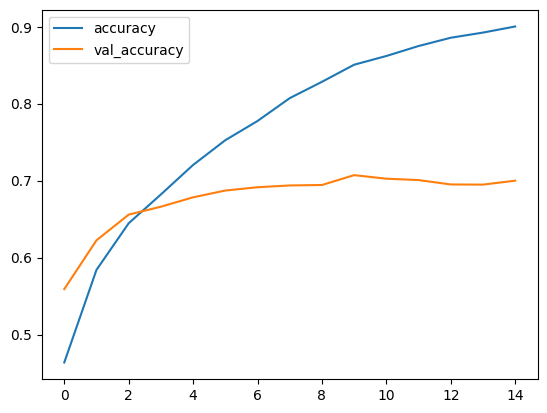

In [9]:
plt.plot(r.history['accuracy'] ,label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

increase in accuracy without any rise in validation accuracy indicates our model is overfitting and changing weights to just match the noise from the training dataset.

313/313 [==============================] - 1s 2ms/step


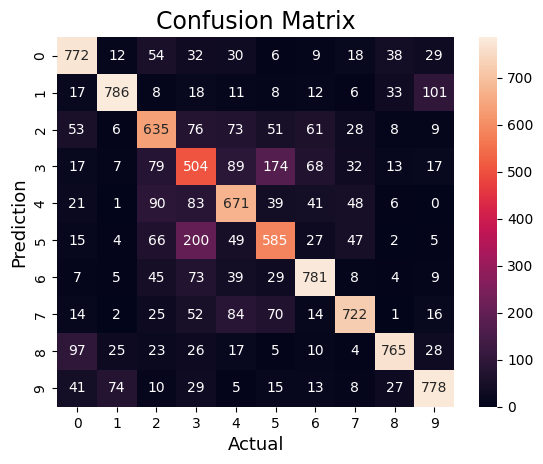

In [11]:
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()